___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objs as go
import plotly.express as px
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

## 1. Exploratory Data Analysis

In [4]:
df = pd.read_csv('HR_Dataset.csv')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [1]:
pwd

'/Users/majed-abdulkareem/Downloads/drive-download-20231204T173143Z-001'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
print('''
number of duplicates> {}
number of missing values> {}'''.format(df.duplicated().sum(), df.isna().sum().sum()))



number of duplicates> 3008
number of missing values> 0


In [8]:
print('shape before droping duplicates',df.shape)
df.drop_duplicates(inplace=True)
print('shape after droping duplicates',df.shape)

shape before droping duplicates (14999, 10)
shape after droping duplicates (11991, 10)


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000
mean,0.630,0.717,3.803,200.474,3.365,0.154,0.166,0.017
std,0.241,0.168,1.163,48.728,1.330,0.361,0.372,0.129
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.480,0.570,3.000,157.000,3.000,0.000,0.000,0.000
50%,0.660,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.860,5.000,243.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


#### Overall Statistics
- Satisfaction Level: Ranges from 0.09 to 1.0, with a mean of approximately 0.61.
- Last Evaluation: Varies from 0.36 to 1.0, with an average of around 0.72.
- Number of Projects: Employees are involved in 2 to 7 projects.
- Average Monthly Hours: Spans from 96 to 310 hours, with an average of 201 hours.
- Time Spent in Company: Ranges from 2 to 10 years.
- Work Accidents: Occurred for approximately 14.5% of employees.
- Promotions in Last 5 Years: A small percentage of employees (about 2%) received promotions.

In [10]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [11]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [12]:

data = go.Pie(labels=['Stayed', 'Left'], values=df['left'].value_counts(), hole=0.3)

layout = go.Layout(
    title="Proportion of Employees Stayed vs Left",
    annotations=[dict(text='Stayed vs Left', x=0.5, y=0.5, font_size=10, showarrow=False)]
)

fig = go.Figure(data=[data], layout=layout)

fig.show()

In [13]:
stayed = df[df['left'] == 0]
left = df[df['left'] == 1]

In [14]:
stayed.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,0.667,0.716,3.787,198.943,3.262,0.174,0.000,0.019
std,0.217,0.162,0.982,45.666,1.367,0.380,0.000,0.138
min,0.120,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.540,0.580,3.000,162.000,2.000,0.000,0.000,0.000
50%,0.690,0.710,4.000,198.000,3.000,0.000,0.000,0.000
75%,0.840,0.850,4.000,238.000,4.000,0.000,0.000,0.000
max,1.000,1.000,6.000,287.000,10.000,1.000,0.000,1.000


#### Statistics for Employees Who Stayed
- Satisfaction Level: Higher on average compared to those who left.
- Last Evaluation: Similar average to those who left, indicating performance may not be a significant factor in deciding to stay.
- Number of Projects and Average Monthly Hours: Slightly lower than those who left, suggesting a possible correlation between work-life - - balance and employee retention.
- Time Spent in Company: A broad range, but generally employees who stayed have spent a longer time at the company.
- Promotions: Similar promotion rates to those who left.

In [15]:
left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000
mean,0.440,0.722,3.883,208.162,3.881,0.053,1.000,0.004
std,0.265,0.197,1.817,61.295,0.974,0.224,0.000,0.063
min,0.090,0.450,2.000,126.000,2.000,0.000,1.000,0.000
25%,0.110,0.520,2.000,146.000,3.000,0.000,1.000,0.000
50%,0.410,0.790,4.000,226.000,4.000,0.000,1.000,0.000
75%,0.730,0.910,6.000,262.500,5.000,0.000,1.000,0.000
max,0.920,1.000,7.000,310.000,6.000,1.000,1.000,1.000


#### Statistics for Employees Who Left
- Satisfaction Level: Lower on average, indicating dissatisfaction as a potential reason for leaving.
- Number of Projects and Average Monthly Hours: On average, employees who left were involved in more projects and worked more hours.
- Time Spent in Company: Shorter, on average, compared to those who stayed.


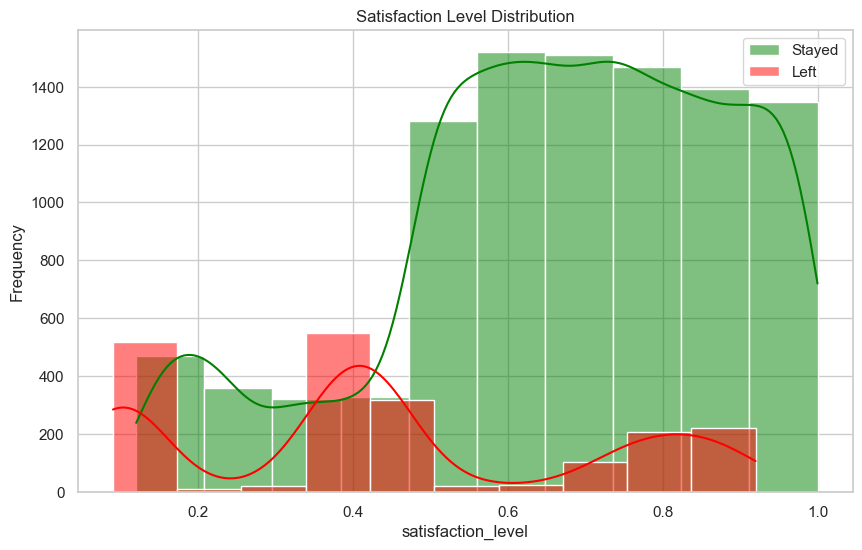

In [16]:
sns.set(style="whitegrid")

# Creating histograms for key numerical variables
def plot_histograms(data1, data2, column, title, bins=10):
    plt.figure(figsize=(10, 6))
    sns.histplot(data1[column], color="green", label='Stayed', kde=True, bins=bins)
    sns.histplot(data2[column], color="red", label='Left', kde=True, bins=bins)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Satisfaction Level
plot_histograms(stayed, left, 'satisfaction_level', 'Satisfaction Level Distribution')



#### Satisfaction Level:

- Employees who left generally show lower satisfaction levels, with a significant peak in the lower range (<0.2).
- Employees who stayed are more evenly distributed across satisfaction levels, with a higher frequency in the higher range (>0.7).

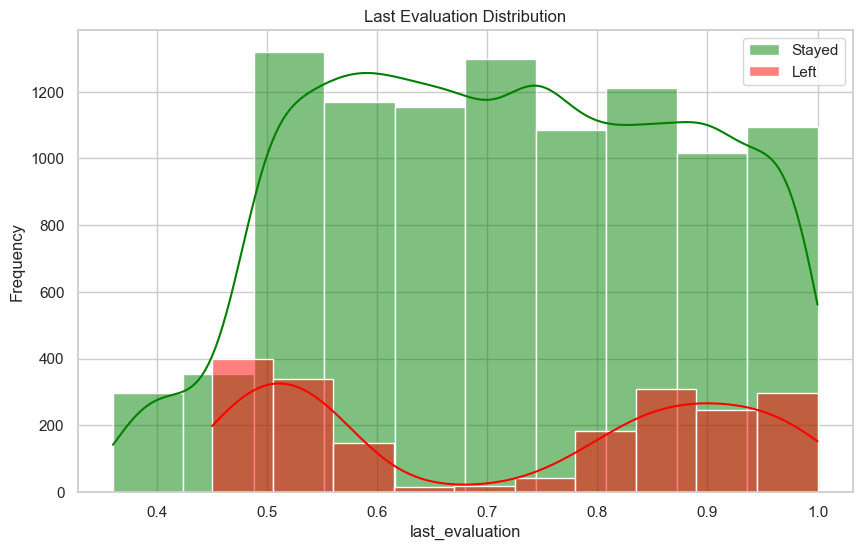

In [17]:
# Last Evaluation
plot_histograms(stayed, left, 'last_evaluation', 'Last Evaluation Distribution')



#### Last Evaluation:

- The distribution of last evaluations is somewhat similar for both groups, but employees who left show a slight increase in the higher range (>0.8), suggesting high performers might be leaving as well.

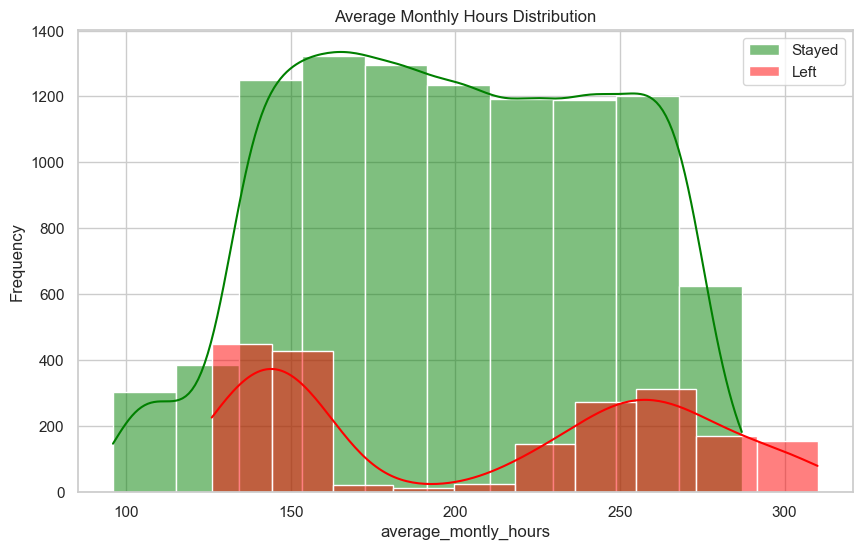

In [18]:
# Average Monthly Hours
plot_histograms(stayed, left, 'average_montly_hours', 'Average Monthly Hours Distribution')

#### Average Monthly Hours:

- Employees who left tend to work either significantly fewer or significantly more hours than average, with peaks at both ends of the distribution.
- Employees who stayed show a more central, normally distributed pattern around the average.

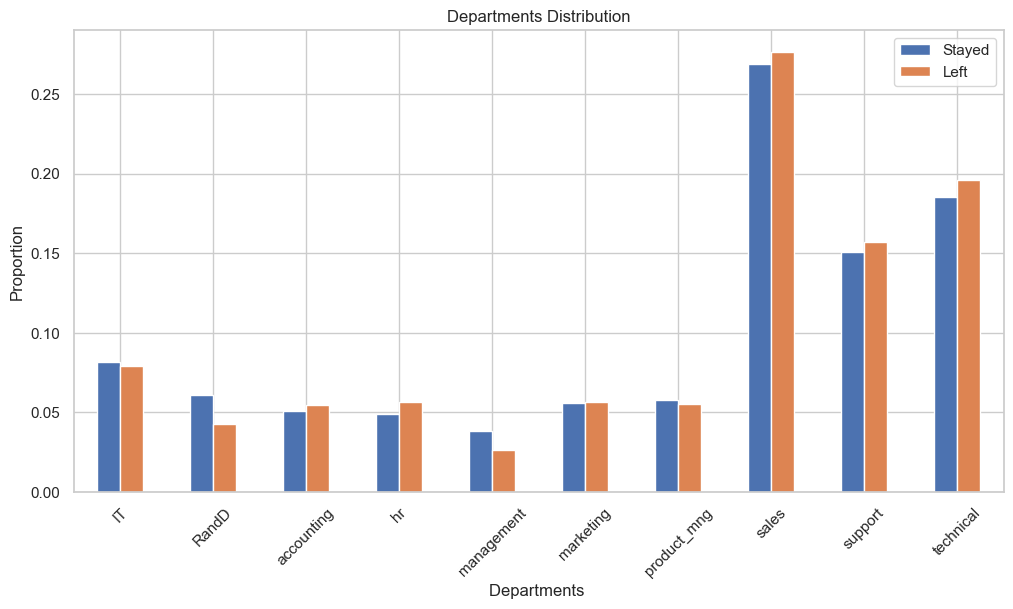

In [19]:
def plot_bar_plots(data1, data2, column, title):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Counting the occurrences for each category
    data1_counts = data1[column].value_counts(normalize=True).rename('Stayed')
    data2_counts = data2[column].value_counts(normalize=True).rename('Left')

    # Merging the counts and plotting
    pd.concat([data1_counts, data2_counts], axis=1, sort=True).plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Proportion')
    ax.set_xlabel(column)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Departments
plot_bar_plots(stayed, left, 'Departments ', 'Departments Distribution')



#### Departments Distribution:

- The proportion of employees in each department is somewhat similar for those who stayed and those who left.
- However, certain departments like sales, technical, and support have a slightly higher proportion of employees who left.

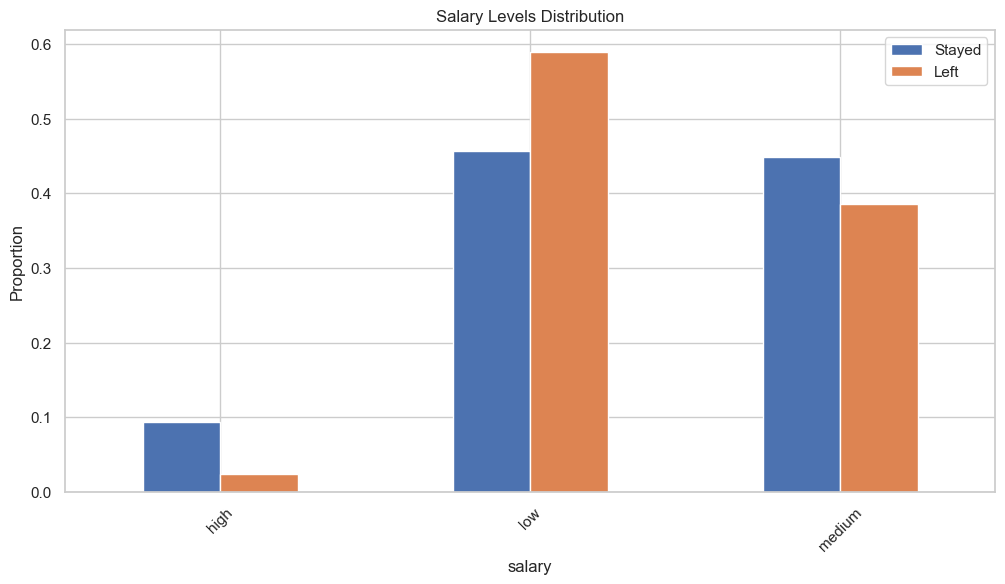

In [20]:
# Salary Levels
plot_bar_plots(stayed, left, 'salary', 'Salary Levels Distribution')

#### Salary Levels Distribution:

- A significant difference is observed in the salary levels. A higher proportion of employees with low salaries left the company compared to those with higher salaries.
- This suggests that salary level might be a significant factor in an employee's decision to leave.

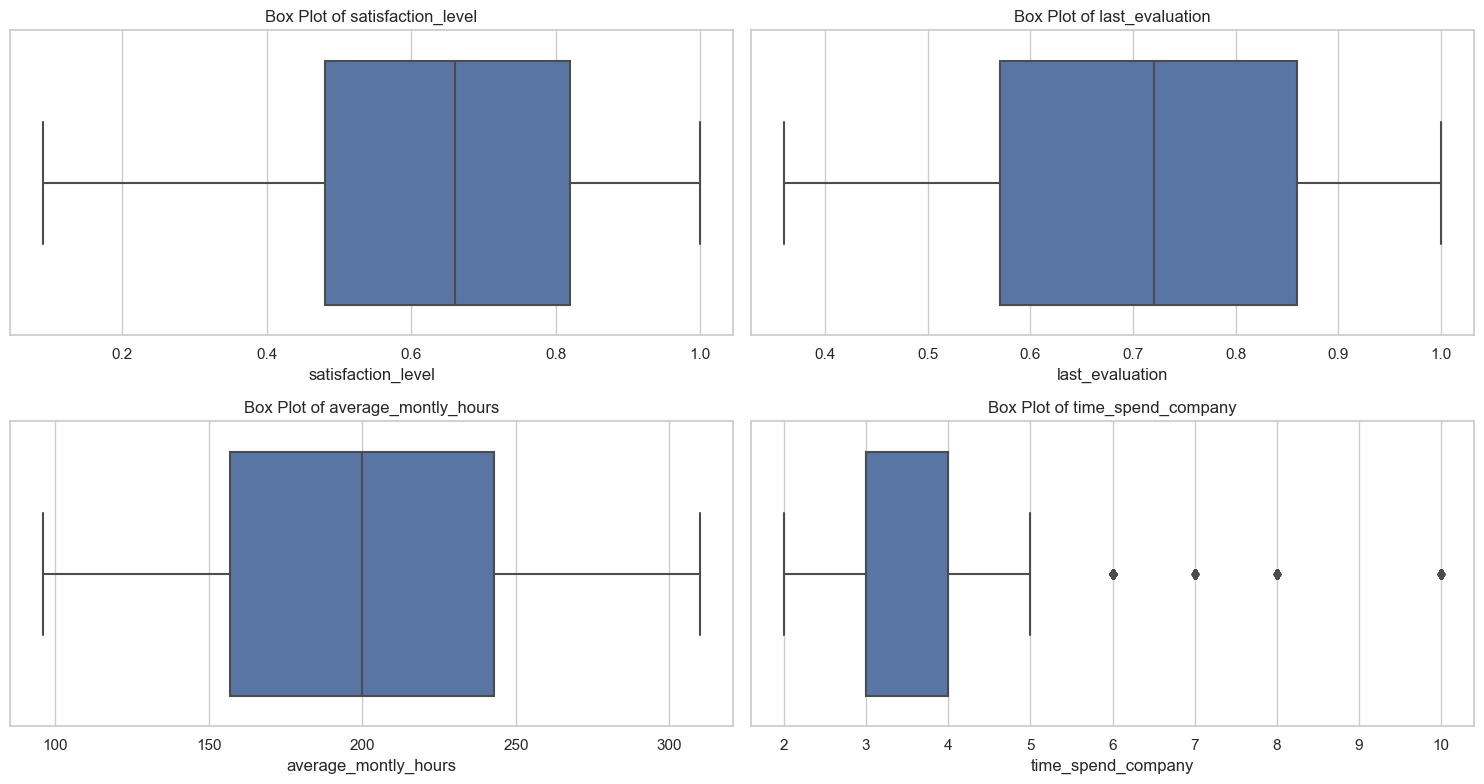

In [21]:
# Outlier Analysis using Box Plots
numerical_columns = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']

plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


- Satisfaction Level: This variable shows a fairly normal distribution without significant outliers.

- Last Evaluation: Similar to satisfaction level, last evaluation scores are evenly distributed without notable outliers.

- Average Monthly Hours: This distribution seems balanced, but there's a wide range in the hours worked, which is expected given the nature of the variable. No specific outliers are evident.

- Time Spent in the Company: Most values cluster around 2 to 5 years, but there are outliers beyond 7 years. These represent employees who have stayed with the company for an unusually long time compared to the majority.

In [22]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [23]:
outliers_info = {}
numerical_columns = df.columns[:-5]
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_info[col] = {
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": outliers.shape[0]
    }

pd.DataFrame(outliers_info)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
IQR,0.340,0.290,2.000,86.000,1.000
Lower Bound,-0.030,0.135,0.000,28.000,1.500
Upper Bound,1.330,1.295,8.000,372.000,5.500
Outliers Count,0.000,0.000,0.000,0.000,824.000


#### Satisfaction Level:

    Interquartile Range (IQR): 0.340
    Lower Bound (LB): -0.030 (Since satisfaction level cannot be negative, this practical LB is 0)
    Upper Bound (UB): 1.330 (Since satisfaction level cannot exceed 1, this practical UB is 1)
    Outliers Count: 0
    Last Evaluation:

    IQR: 0.290
    LB: 0.135
    UB: 1.295 (Practically, this UB is 1)
    Outliers Count: 0
    Number of Projects:

    IQR: 2.000
    LB: 0.000 (Practically, a count of projects cannot be negative, so this LB is 0)
    UB: 8.000
    Outliers Count: 0
    Average Monthly Hours:

    IQR: 86.000
    LB: 28.000 (This LB is unrealistically low for average monthly working hours)
    UB: 372.000
    Outliers Count: 0
    Time Spent in Company:

    IQR: 1.000
    LB: 1.500
    UB: 5.500
    Outliers Count: 824

In [24]:
from scipy import stats

# Hypothesis Testing: Comparing mean satisfaction level between employees who stayed and those who left
stayed_satisfaction = df[df['left'] == 0]['satisfaction_level']
left_satisfaction = df[df['left'] == 1]['satisfaction_level']

# Performing an independent samples t-test
t_stat, p_value = stats.ttest_ind(stayed_satisfaction, left_satisfaction)

t_stat, p_value


(40.98502015841721, 0.0)

    The very high t-statistic and the p-value of 0.0 (indicating a value smaller than can be accurately represented) suggest that there is a statistically significant difference in the mean satisfaction levels between the two groups. Specifically, the high t-statistic indicates that the group of employees who stayed has a higher mean satisfaction level compared to those who left, which aligns with our earlier observations from the descriptive statistics and visualizations.

In [25]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,0,1,management,high
11996,0.740,0.950,5,266,10,0,0,1,management,high
11997,0.850,0.540,3,185,10,0,0,1,management,high
11998,0.330,0.650,3,172,10,0,0,1,marketing,high


In [30]:
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [31]:
df[df['time_spend_company']== 2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
50,0.130,0.780,6,152,2,0,1,0,support,low
116,0.860,0.680,5,263,2,0,1,0,technical,medium
175,0.540,0.740,4,164,2,0,1,0,sales,low
376,0.560,0.710,4,296,2,0,1,0,IT,medium
378,0.310,0.560,4,238,2,0,1,0,accounting,medium
...,...,...,...,...,...,...,...,...,...,...
11916,0.370,0.720,3,183,2,0,0,0,sales,low
11925,0.420,0.690,3,126,2,0,0,0,sales,low
11952,0.520,0.620,5,239,2,0,0,0,sales,medium
11969,0.600,0.850,3,242,2,0,0,0,IT,low


In [ ]:
from scipy.stats import ttest_ind

# Null Hypothesis: No difference in the mean number of projects between employees who left and those who stayed.
# Alternative Hypothesis: There is a difference.

# Filter the data for employees who stayed and who left
stayed_projects = df[df['left'] == 0]['number_project']
left_projects = df[df['left'] == 1]['number_project']

# Perform the t-test
t_stat, p_value = ttest_ind(stayed_projects, left_projects)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -3.3880208345839424, P-value: 0.0007062542110999653


#### For the number of projects :

    T-statistic: -3.38880203845839424
    P-value: 0.0007062542110999653
    The negative T-statistic indicates that employees who left had on average fewer projects than those who stayed, and the very small P-value suggests that this difference is statistically significant. Therefore, we would reject the null hypothesis that there is no difference in the mean number of projects between employees who left and those who stayed.

In [ ]:
from scipy.stats import chi2_contingency

# Null Hypothesis: Promotion status and leaving the company are independent.
# Alternative Hypothesis: There is an association between promotion status and leaving the company.

# Create a contingency table
promotion_crosstab = pd.crosstab(df['promotion_last_5years'], df['left'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(promotion_crosstab)

print(f"Chi-squared: {chi2}, P-value: {p_value}")

Chi-squared: 22.992127549276592, P-value: 1.6266615348676462e-06


#### For the promotion status :

    Chi-squared: 22.99217549276952
    P-value: 1.6266615348676462e-06
    The Chi-squared test result is significantly large, and the P-value is very small (much less than 0.05), indicating that there is a statistically significant association between promotion status and leaving the company. This means we would reject the null hypothesis and conclude that the promotion status is related to whether an employee left or stayed.

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p_value, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

i = [ 'number_project',
        'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']
for j in i : 

    cramers_v_value = cramers_v(df[j], df['left'])
    print(f"{j}--   Cramer's V: {cramers_v_value}")

In [ ]:

i = [ 'number_project',
        'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']
for j in i : 

    cramers_v_value = cramers_v(df[j], df['left'])
    print(f"{j}--   Cramer's V: {cramers_v_value}")


number_project--   Cramer's V: 0.5558362235753819
time_spend_company--   Cramer's V: 0.32820626344308246
Work_accident--   Cramer's V: 0.12479766855777245
promotion_last_5years--   Cramer's V: 0.042827547879053664
Departments --   Cramer's V: 0.03144658366048397
salary--   Cramer's V: 0.12019255948616368


    number_project (0.556): There's a moderately strong association between the number of projects an employee works on and whether they leave the company. This suggests that the number of projects could be a significant factor in an employee's decision to stay or leave.

    time_spend_company (0.328): There's a moderate association between the time an employee has spent at the company and whether they leave. This may indicate that tenure can influence an employee's likelihood of leaving, with either very short or very long tenures being potential factors.

    Work_accident (0.125): There's a weak association here. While work accidents might have some influence on an employee's decision to leave, it's not as strong as other factors.

    promotion_last_5years (0.043): There's a very weak association with leaving the company. This indicates that recent promotions are not a strong determinant of whether an employee leaves, at least not on their own.

    Departments (0.031): There's a very weak association, suggesting that the department alone is not a strong predictor of employee turnover.

    salary (0.120): There's a weak association between salary level and leaving. It may play a role in an employee's decision to leave, but it's not the strongest factor compared to others like the number of projects.

## 2. Data Visualization

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [50]:
for i in ['satisfaction_level', 'last_evaluation','average_montly_hours']:
    fig = px.histogram(df, x=i, nbins=100, title=f'{i} Distribution')
    fig.update_layout(bargap=0.1)
    fig.show()

In [ ]:
# Satisfaction Level vs Churn
fig_sat = px.box(df, x='left', y='satisfaction_level', 
                 title='Satisfaction Level vs Churn',
                 labels={"left": "Churn"})

fig_sat.show()



#### Satisfaction Level vs Churn: There's a noticeable difference in the satisfaction levels between those who left and those who stayed. Employees who left generally had lower satisfaction levels.


In [ ]:

# Last Evaluation vs Churn
fig_eval = px.box(df, x='left', y='last_evaluation', 
                  title='Last Evaluation vs Churn',
                  labels={"left": "Churn"})


fig_eval.show()



#### The distribution of last evaluation scores doesn't show a stark difference between those who left and those who stayed, suggesting that performance evaluations might not be the primary driver of churn.


In [ ]:
# Number of Projects vs Churn
fig_proj = px.histogram(df, x='number_project', color='left', 
                        barmode='group',
                        title='Number of Projects vs Churn',
                        labels={"left": "Churn"})

fig_proj.show()


#### Employees handling too few or too many projects seem more likely to leave. Those with 2 or fewer, or more than 6 projects, show higher churn rates.

In [ ]:

# Average Monthly Hours vs Churn
fig_hours = px.box(df, x='left', y='average_montly_hours', 
                   title='Average Monthly Hours vs Churn',
                   labels={"left": "Churn"})

fig_hours.show()



#### Employees who worked significantly fewer or significantly more hours than average seem more likely to churn. This suggests a potential issue with work-life balance.



<AxesSubplot:xlabel='average_montly_hours', ylabel='satisfaction_level'>

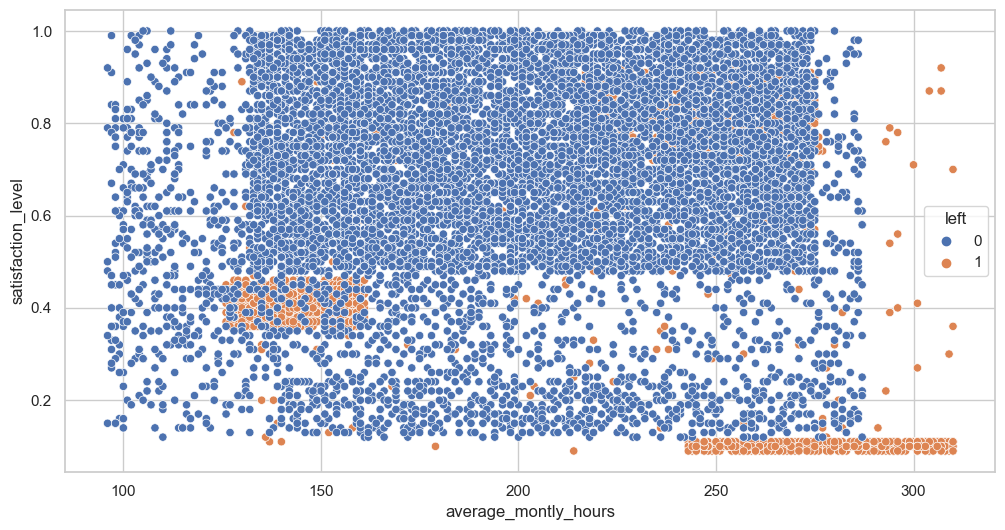

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="average_montly_hours", y="satisfaction_level", hue='left')

In [ ]:

# Time Spent in Company vs Churn
fig_time = px.histogram(df, x='time_spend_company', color='left', 
                        barmode='group',
                        title='Time Spent in Company vs Churn',
                        labels={"left": "Churn"})

fig_time.show()


#### Employees with 3, 4, 5, or 6 years in the company have higher churn rates. This could indicate a mid-career crisis or dissatisfaction with long-term career prospects.

In [ ]:
# Salary Level vs Churn
fig_salary = px.histogram(df, x='salary', color='left', 
                          barmode='group',
                          title='Salary Level vs Churn',
                          labels={"left": "Churn"})
fig_salary.show()

#### Salary Level vs Churn: Employees with lower salaries show a higher tendency to leave, indicating that compensation could be a significant factor in employee retention.



In [38]:
fig_dept = px.histogram(df, x='Departments ', color='left', 
                        barmode='group',
                        title='Department vs Churn',
                        labels={"left": "Churn"})
fig_dept.show()



### Department vs Churn:

- Certain departments such as sales, technical, and support have higher numbers of employees who have left (churned).

- The management department has a noticeably lower churn rate, which could indicate better job satisfaction or retention strategies in place for these roles.

- HR and RandD departments have moderate churn rates, but these need to be contextualized against the size of the department. For instance, if RandD is a small department but has a moderate absolute number of churns, the relative churn rate might be high.

In [39]:
# Work Accident vs Churn
fig_accident = px.histogram(df, x='Work_accident', color='left', 
                            barmode='group',
                            title='Work Accident vs Churn',
                            labels={"left": "Churn", "Work_accident": "Work Accident"})
fig_accident.show()



### Work Accident vs Churn:

- A significant number of employees who have not had work accidents have left the company. This could suggest that work accidents are not a major factor in the decision to leave.

- However, there's a smaller, yet considerable number of employees who had work accidents and still left, which might imply other factors at play influencing their decision to churn beyond work accidents.

In [40]:
# Promotion in the Last 5 Years vs Churn
fig_promotion = px.histogram(df, x='promotion_last_5years', color='left', 
                             barmode='group',
                             title='Promotion in Last 5 Years vs Churn',
                             labels={"left": "Churn", "promotion_last_5years": "Promotion in Last 5 Years"})
fig_promotion.show()

### Promotion in the Last 5 Years vs Churn:

- A vast majority of those who left had not received a promotion in the last five years. This suggests a strong correlation between lack of promotions and the decision to leave.

- Very few employees who received a promotion in the last five years decided to leave, which implies that career advancement could be a key factor in employee retention.

In [ ]:
### add expliations for these

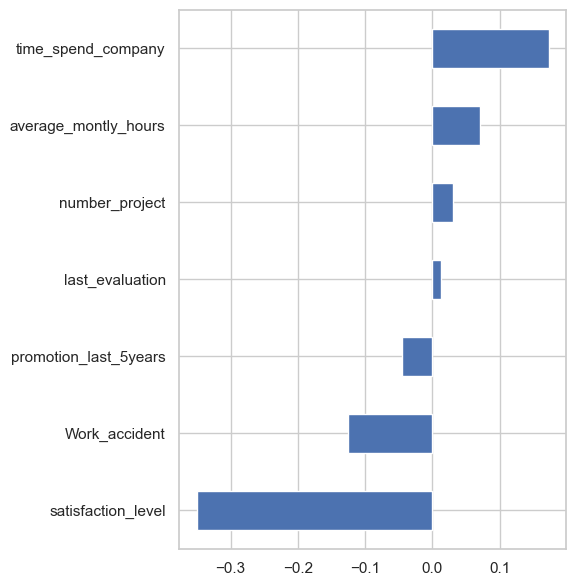

time_spend_company       0.173
average_montly_hours     0.070
number_project           0.031
last_evaluation          0.014
promotion_last_5years   -0.045
Work_accident           -0.125
satisfaction_level      -0.351
Name: left, dtype: float64

In [45]:
plt.figure(figsize=(5,7))
(df.corr(numeric_only=True)["left"].sort_values().drop("left").plot(kind="barh"))
plt.show()
df.corr(numeric_only=True)["left"].sort_values(ascending=False).drop("left")

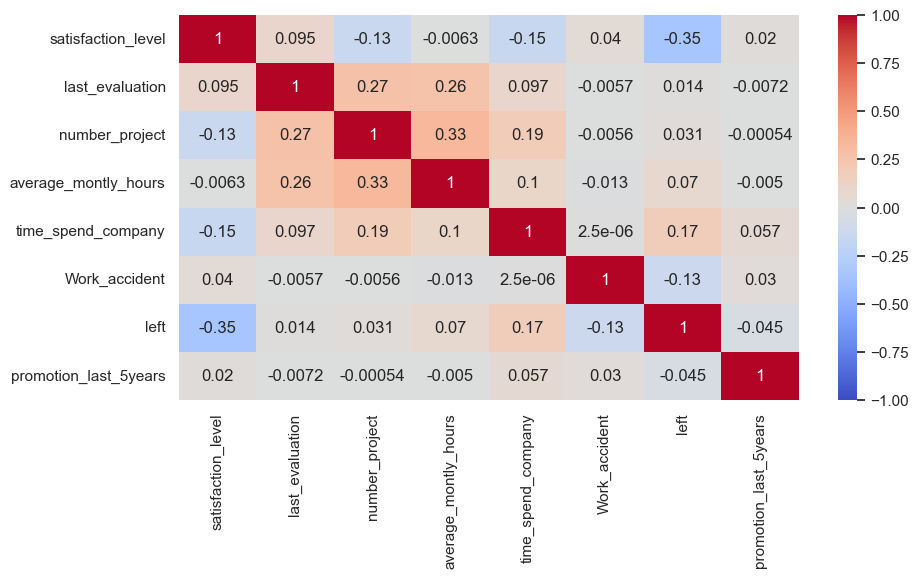

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

In [60]:
ls

Churn Prediction_Student_Notebook_V3.ipynb
HR_Dataset.csv
HR_model.pkl
appp.py


In [56]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [59]:
df['Departments '].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Departments , dtype: int64

## 4. Cluster Analysis

In [54]:
ls

Churn Prediction_Student_Notebook_V3.ipynb
HR_Dataset.csv
HR_model.pkl
appp.py


In [61]:
ls

Churn Prediction_Student_Notebook_V3.ipynb
HR_Dataset.csv
HR_model.pkl
appp.py


## 5. Predictive Model Building

### Preprocessing

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### Model Building

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

####  Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___